# Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, Divisive and Agglomerative.

<img src='../../../img/Clustering_h1.png' height="600" width="800">

### Divisive method

In divisive or top-down clustering method we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative  algorithms in some circumstances but is conceptually more complex.

### Agglomerative method

In agglomerative or bottom-up clustering method we assign each observation to its own cluster. Then, compute the similarity (e.g., distance) between each of the clusters and join the two most similar clusters. Finally, repeat steps 2 and 3 until there is only a single cluster left. The related algorithm is shown below.

<img src='../../../img/Clustering_h2.png' height="600" width="800">

### Code Dictionary
code | description
-----|------------
`scipy.cluster.hierarchy` | Hierarchical clustering.
`AgglomerativeClustering` | Hierarchical Agglomerative Clustering.
`.iloc` | integer-location based indexing for selection by position.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

Text(0, 0.5, 'Euclidean distances')

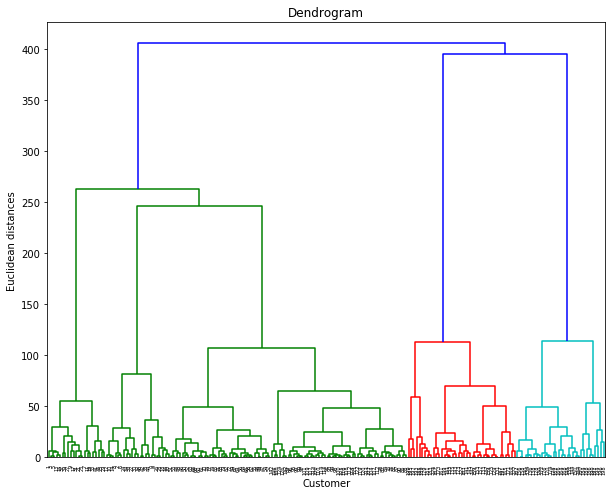

In [3]:
import scipy.cluster.hierarchy as sch
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),  ax=axes,)
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distances')

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

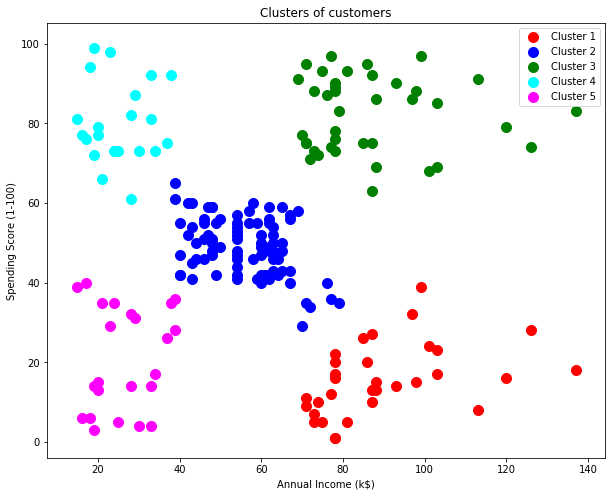

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()